In [30]:
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [4]:
!pip install -q ucimlrepo

In [38]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# # metadata
# print(statlog_german_credit_data.metadata)

# # variable information
# print(statlog_german_credit_data.variables)

In [39]:
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [8]:
le = [
    'Attribute1',
    'Attribute3',
    'Attribute4',
    'Attribute6',
    'Attribute7',
    'Attribute9',
    'Attribute10',
    'Attribute12',
    'Attribute14',
    'Attribute15',
    'Attribute17',
    'Attribute19',
    'Attribute20',
]

In [40]:
label_enc = LabelEncoder()
label_enc.fit(X[le].to_numpy().flatten())

for col in le:
    X.loc[:, (col)] = label_enc.transform(X[col])


In [41]:
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,3,6,29,34,1169,44,49,4,52,0,4,5,67,13,15,2,19,1,22,23
1,4,48,27,34,5951,40,47,2,51,0,2,5,22,13,15,1,19,1,21,23
2,10,12,29,37,2096,40,48,2,52,0,3,5,49,13,15,1,18,2,21,23
3,3,42,27,33,7882,40,48,2,52,2,4,6,45,13,16,1,19,2,21,23
4,3,24,28,30,4870,40,47,3,52,0,4,8,53,13,16,2,19,2,21,23


In [42]:
norm = StandardScaler()
norm.fit(X)
df = norm.transform(X)

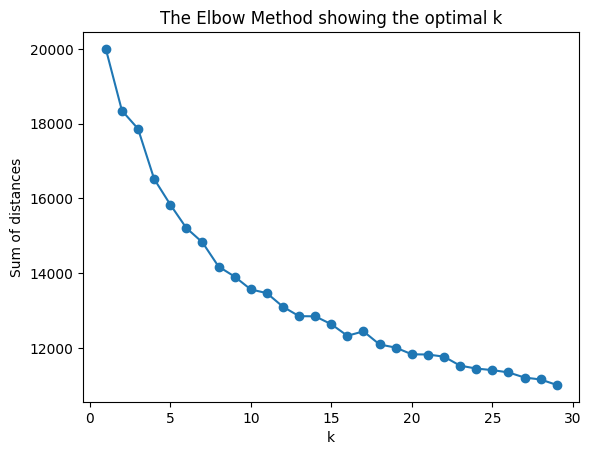

In [46]:
K = range(1, 30)
models = [KMeans(n_clusters=k).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [48]:
model = KMeans(n_clusters=25)
model.fit(df)
X['cluster'] = model.labels_
X.groupby('cluster').mean()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
cluster,,,,,,,,,,,,,,,,,,,,
0,6.1,20.400000,28.85,33.1,3029.950000,40.2,46.35,3.850000,52.45,0.05,2.650000,6.9,35.100000,12.65,15.15,2.350000,19.5,1.100000,21.85,23.0
1,6.206897,16.637931,27.12069,32.224138,2758.275862,41.137931,46.775862,1.810345,50.948276,0.068966,3.603448,6.189655,27.034483,12.913793,14.206897,1.137931,18.603448,1.000000,21.189655,23.0
2,5.289474,13.368421,26.986842,33.25,1498.144737,40.131579,46.684211,3.342105,51.526316,0.026316,1.986842,5.631579,27.592105,12.934211,14.907895,1.052632,18.618421,1.000000,21.039474,23.0
3,5.767442,14.860465,28.534884,32.906977,1569.302326,40.488372,48.674419,3.651163,51.906977,0.046512,3.720930,5.883721,51.906977,12.813953,15.069767,1.930233,18.72093,1.023256,21.255814,23.0
4,6.483871,19.064516,27.0,32.225806,1974.806452,43.645161,47.096774,3.838710,51.483871,0.0,2.290323,6.225806,28.516129,12.967742,14.806452,1.032258,18.935484,1.000000,21.032258,23.0
5,6.347826,28.478261,27.565217,31.608696,9867.608696,42.130435,47.956522,2.304348,51.695652,0.0,3.521739,7.826087,46.826087,12.608696,15.869565,1.217391,19.521739,1.260870,21.826087,23.0
6,6.857143,20.535714,27.357143,32.857143,2743.571429,41.25,48.607143,3.107143,51.75,0.071429,3.428571,7.107143,41.214286,11.071429,15.214286,1.500000,18.964286,2.000000,21.428571,23.0
7,6.305556,11.416667,27.694444,31.527778,2109.944444,41.194444,47.222222,2.500000,51.944444,0.444444,2.555556,5.638889,35.277778,12.777778,14.75,1.388889,18.527778,1.305556,21.111111,24.0
8,7.052632,30.526316,27.552632,38.473684,5223.342105,41.131579,47.052632,2.210526,51.473684,0.0,2.210526,6.394737,31.342105,12.447368,15.0,1.894737,18.973684,1.026316,21.578947,23.0


In [49]:
X['cluster'].sort_values()

,cluster
20,0
412,0
409,0
432,0
890,0
...,...
46,24
440,24
365,24
380,24


In [51]:
y['class'].unique()

array([1, 2])